# Analyzing the Relationship between Air Pollutants and Carbon Dioxide Emissions in Singapore

## Details
Name: Reuben Goh

Adm Num: P2205711

Class: EP0302 04

## URLs of Datasets Chosen
1. [Air Pollutant - Nitrogen Dioxide](https://beta.data.gov.sg/collections/1366/datasets/d_88dcbdd26f7adbb5a469491378abfedc/view)

2. [Air Pollutant - Ozone](https://beta.data.gov.sg/collections/1367/datasets/d_12e90ff1178704ebd56dc2fff04eef56/view)

3. [Air Pollutant - Particulate Matter PM2.5](https://beta.data.gov.sg/collections/1369/datasets/d_397fe8de643aea9927bdee32e49307ff/view)

4. [Average Daily Polyclinic Attendances for Selected Diseases](https://beta.data.gov.sg/datasets/d_5d5508f1c954f5630d7b3aa7875d01f9/view)



#### Important Note:
need to run every single python cell from top - down

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import os

In [49]:
# handling data sets to be used later

# store the paths of the datasets in a dictionary
data_set_list = {
  "no2": os.path.join("datasets", "AirPollutantNitrogenDioxide.csv"),
  "ozone": os.path.join("datasets", "AirPollutantOzone.csv"),
  "pm2.5": os.path.join("datasets", "AirPollutantParticulateMatterPM2.5.csv"),
  "disease": os.path.join("datasets", "AverageDailyPolyclinicAttendancesforSelectedDiseases.csv")
}

# load the datasets into numpy arrays
no2_data = np.genfromtxt(data_set_list["no2"], delimiter=",", skip_header=1)
# filter to only 2012 to 2022 (to make it same time frame as diseases data)
no2_data = no2_data[(no2_data[:, 0] >= 2012) & (no2_data[:, 0] <= 2022)]

ozone_data = np.genfromtxt(data_set_list["ozone"], delimiter=",", skip_header=1)
# filter to only 2012 to 2022 (to make it same time frame as diseases data)
ozone_data = ozone_data[(ozone_data[:, 0] >= 2012) & (ozone_data[:, 0] <= 2022)]

pm25_data = np.genfromtxt(data_set_list["pm2.5"], delimiter=",", skip_header=1)
# filter to only 2012 to 2022 (to make it same time frame as diseases data)
pm25_data = pm25_data[(pm25_data[:, 0] >= 2012) & (pm25_data[:, 0] <= 2022)]

# load diseases (will be filtered out later to only look at respiratory diseases in this project)
disease_data = np.genfromtxt(data_set_list["disease"], delimiter=",", skip_header=1, dtype=[("epi_week", "U8"), ("disease", "U100"), ("no_of_cases", "i8")])

def air_pollutant_analysis(air_pollutant:np.ndarray, air_pollutant_name:str):
  '''
  This function takes in a numpy array of air pollutant data and the name of the air pollutant and prints out the analysis of the data.
  Note: this function is only applicable for the air pollutant datasets with columns "year" and "mean concentration".

  Args:
    air_pollutant: numpy array of air pollutant data
    air_pollutant_name: name of the air pollutant
  '''
  header = f"============== {air_pollutant_name} Data =============="
  print(header)
  print(f"There are a total of {air_pollutant.shape[0]} rows in this dataset.")
  print(f"Each row contains year and mean concentration of {air_pollutant_name} in the air.") # can set this since all 3 air pollutants have the same format
  print(f"The highest mean concentration of {air_pollutant_name} is {np.max(air_pollutant[:, 1])} in the year {int(air_pollutant[np.argmax(air_pollutant[:, 1]), 0])}.")
  print(f"The lowest mean concentration of {air_pollutant_name} is {np.min(air_pollutant[:, 1])} in the year {int(air_pollutant[np.argmin(air_pollutant[:, 1]), 0])}.")
  print(f"The average mean concentration of {air_pollutant_name} is {np.mean(air_pollutant[:, 1]):.2f}.")
  print("".join(["=" for _ in range(len(header))]))

### Dataset 1: Air Pollutant - Nitrogen Dioxide

In [50]:
# analyze nitrogen dioxide data

air_pollutant_analysis(no2_data, "Nitrogen Dioxide")

============== Nitrogen Dioxide Data ==============
There are a total of 11 rows in this dataset.
Each row contains year and mean concentration of Nitrogen Dioxide in the air.
The highest mean concentration of Nitrogen Dioxide is 26.0 in the year 2016.
The lowest mean concentration of Nitrogen Dioxide is 20.0 in the year 2020.
The average mean concentration of Nitrogen Dioxide is 24.18.


### Dataset 2: Air Pollutant - Ozone

In [51]:
# analyze ozone data

air_pollutant_analysis(ozone_data, "Ozone")

============== Ozone Data ==============
There are a total of 11 rows in this dataset.
Each row contains year and mean concentration of Ozone in the air.
The highest mean concentration of Ozone is 191.0 in the year 2017.
The lowest mean concentration of Ozone is 115.0 in the year 2016.
The average mean concentration of Ozone is 143.09.


### Dataset 3: Air Pollutant - Particulate Matter PM2.5

In [52]:
# analyze particulate matter PM2.5 data

air_pollutant_analysis(pm25_data, "Particulate Matter PM2.5")

============== Particulate Matter PM2.5 Data ==============
There are a total of 11 rows in this dataset.
Each row contains year and mean concentration of Particulate Matter PM2.5 in the air.
The highest mean concentration of Particulate Matter PM2.5 is 24.0 in the year 2015.
The lowest mean concentration of Particulate Matter PM2.5 is 11.0 in the year 2020.
The average mean concentration of Particulate Matter PM2.5 is 15.91.


### Dataset 4: Average Daily Polyclinic Attendances for Selected Diseases

In [53]:
# analyze diseases data (only looking at Acute Upper Respiratory Tract infections)

header = "============== Yearly Polyclinic Attendances for Acute Upper Respiratory Tract Infections =============="
print(header)
print(f"Originally, there were {disease_data.shape[0]} rows in this dataset.")
print(f"Originally, there were {np.unique(disease_data['disease']).shape[0]} unique diseases in this dataset.")
print("The unique diseases are:", end=" ")
print(", ".join(list(np.unique(disease_data["disease"]))), end=".\n")

print() # empty line

# filter out respiratory diseases only to be analyzed
respiratory_disease_data = disease_data[disease_data["disease"] == "Acute Upper Respiratory Tract infections"]

print("In this project, only the data for Acute Upper Respiratory Tract infections will be analyzed.")
print(f"There are a total of {respiratory_disease_data.shape[0]} rows in this dataset (Acute Upper Respiratory Tract infections).")
print(f"Each row contains the number of cases of Acute Upper Respiratory Tract infections for a specific week.")
print(f"The dataset contains data from {respiratory_disease_data[0]['epi_week']} to {respiratory_disease_data[-1]['epi_week']}, ", end="")
print(f"which is a total of {respiratory_disease_data.shape[0]} weeks.")

print() # empty line

# print(disease_data)
# print(respiratory_disease_data)

# fix difference in time periods between respiratory data and other air pollutant data
# first, extract year
years = np.array([int(week.split("-")[0]) for week in respiratory_disease_data["epi_week"]])
unique_years = np.unique(years)

print(f"The data for Acute Upper Respiratory Tract infections spans from {unique_years[0]} to {unique_years[-1]}.")

# aggregate respiratory cases by year
respiratory_cases_by_year = np.array([np.sum(respiratory_disease_data[years == year]["no_of_cases"]) for year in unique_years])
# respiratory is now an array with number of cases of Acute Upper Respiratory Tract infections with the same index as unique_years

print(f"The highest aggregate number of cases of Acute Upper Respiratory Tract infections is {np.max(respiratory_cases_by_year)} in the year {unique_years[np.argmax(respiratory_cases_by_year)]}.")
print(f"The lowest aggregate number of cases of Acute Upper Respiratory Tract infections is {np.min(respiratory_cases_by_year)} in the year {unique_years[np.argmin(respiratory_cases_by_year)]}.")
print(f"The average aggregate number of cases of Acute Upper Respiratory Tract infections is {np.mean(respiratory_cases_by_year):.2f}.")

print("".join(["=" for _ in range(len(header))]))

============== Yearly Polyclinic Attendances for Acute Upper Respiratory Tract Infections ==============
Originally, there were 2557 rows in this dataset.
Originally, there were 5 unique diseases in this dataset.
The unique diseases are: Acute Conjunctivitis, Acute Diarrhoea, Acute Upper Respiratory Tract infections, Chickenpox, HFMD.

In this project, only the data for Acute Upper Respiratory Tract infections will be analyzed.
There are a total of 574 rows in this dataset (Acute Upper Respiratory Tract infections).
Each row contains the number of cases of Acute Upper Respiratory Tract infections for a specific week.
The dataset contains data from 2012-W01 to 2022-W52, which is a total of 574 weeks.

The data for Acute Upper Respiratory Tract infections spans from 2012 to 2022.
The highest aggregate number of cases of Acute Upper Respiratory Tract infections is 160934 in the year 2018.
The lowest aggregate number of cases of Acute Upper Respiratory Tract infections is 58478 in the year

### Trends of Air Pollutants and Number of Respiratory Infections (Line Graph)

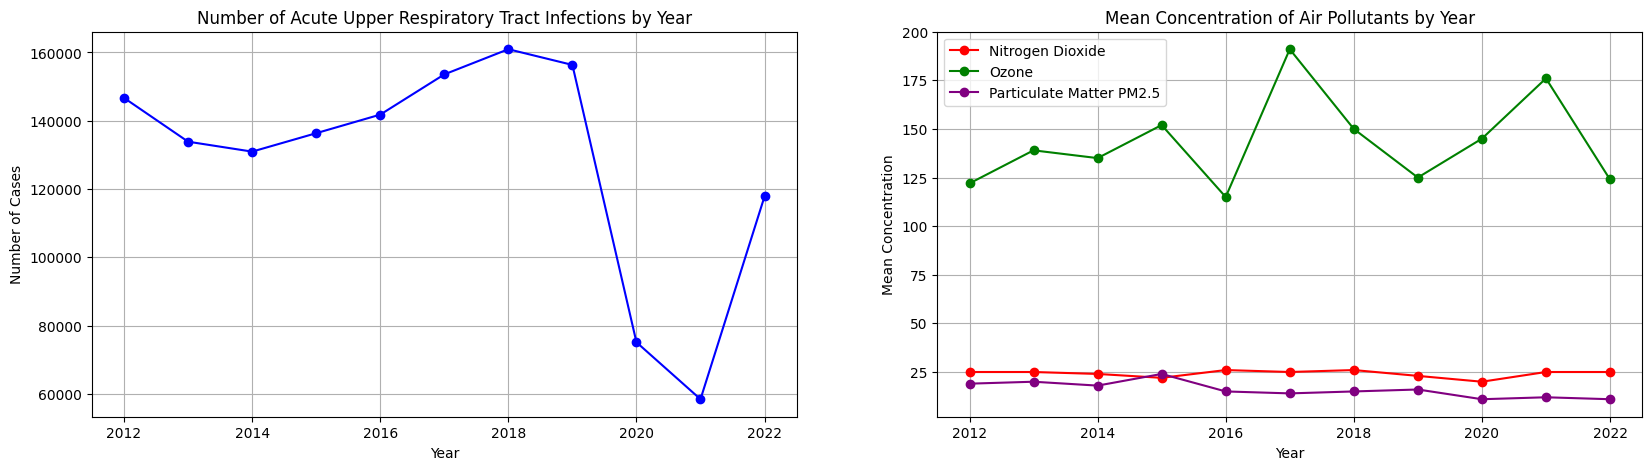

In [54]:
# plot line graph
plt.figure(figsize=(20, 5))

# plot respiratory first
plt.subplot(1, 2, 1)
plt.plot(unique_years, respiratory_cases_by_year, marker="o", color="blue")
plt.title("Number of Acute Upper Respiratory Tract Infections by Year")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid()

# plot air pollutants beside respiratory in 1 graph
plt.subplot(1, 2, 2)
plt.plot(no2_data[:, 0], no2_data[:, 1], marker="o", color="red", label="Nitrogen Dioxide")
plt.plot(ozone_data[:, 0], ozone_data[:, 1], marker="o", color="green", label="Ozone")
plt.plot(pm25_data[:, 0], pm25_data[:, 1], marker="o", color="purple", label="Particulate Matter PM2.5")
plt.title("Mean Concentration of Air Pollutants by Year")
plt.xlabel("Year")
plt.ylabel("Mean Concentration")
plt.legend()
plt.grid()

plt.show()

## Analysis of Line Graph.
Question: How has the average daily cases received for Acute Upper Respiratory Tract Infections changed over the years?

Answer: Between 2012 to 2014, the number of Acute Upper Respiratory Tract Infection cases has been on a slow 